# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Create a Classification dataset

In [16]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

# Scatter Plot of the data

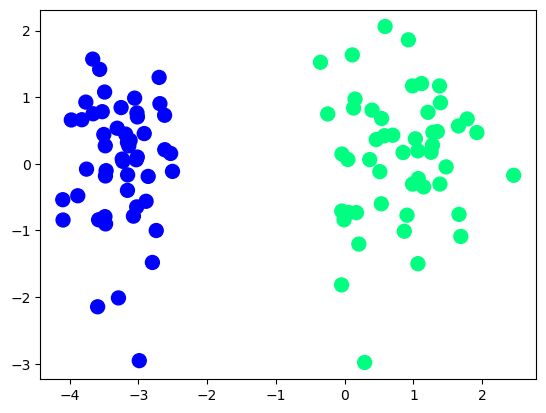

In [17]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Perceptron From Scratch

In [18]:
def step(x):
    return 1 if x > 0 else 0

In [19]:
X.shape

(100, 2)

In [20]:
def perceptron(X, y):

    # Insert 1's at 0th position in X
    X = np.insert(X, 0, 1, axis=1)

    # Initialize the Coefficients/Weights with 1's
    weights = np.ones(X.shape[1])

    # Setting the learning rate to 0.1 and epochs to 1000
    lr = 0.1
    epochs = 1000

    # Intercept and Coefficents 
    intercept, coefficients = 0, 0
    
    for i in range(epochs):

        # Select a random point
        point = np.random.randint(0, X.shape[0])

        # Calculate y_hat which is dot product of that point and weights
        y_hat = step(np.dot(X[point], weights))

        # Update the weights
        weights = weights + lr * (y[point] - y_hat) * X[point]

    intercept, coefficients = weights[0], weights[1:]

    return intercept, coefficients

In [21]:
intercept_, coef_ = perceptron(X, y)
print('Intercept: ', intercept_)
print('Coefficients: ', coef_)

Intercept:  1.2000000000000002
Coefficients:  [1.0580085  0.40381514]


In [22]:
# Ax + By + C = 0 => y = (-C/A)x + (-B/A)
m = - (coef_[0] / coef_[1]) 
b = - (intercept_ / coef_[1])

In [23]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

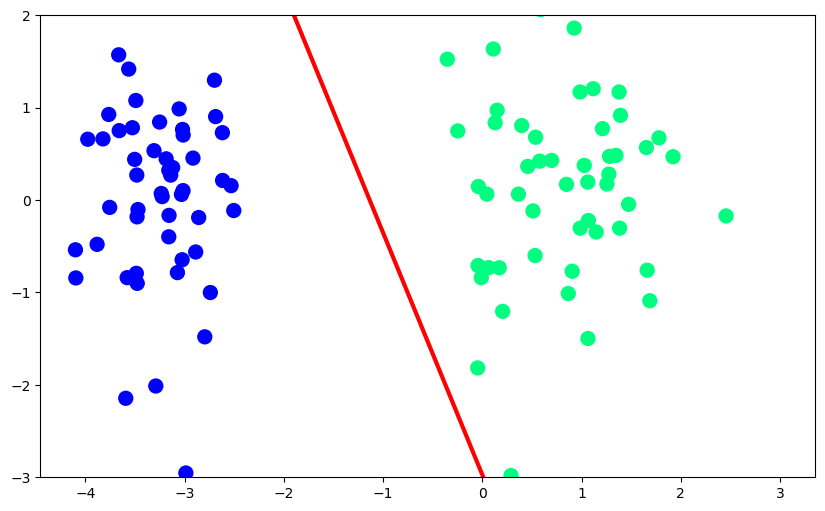

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.show()

# Logistic Regression

In [25]:
lor = LogisticRegression()

In [26]:
lor.fit(X, y)

LogisticRegression()

In [27]:
m = - (lor.coef_[0][0] / lor.coef_[0][1])
b = - (lor.intercept_ / lor.coef_[0][1])

In [28]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

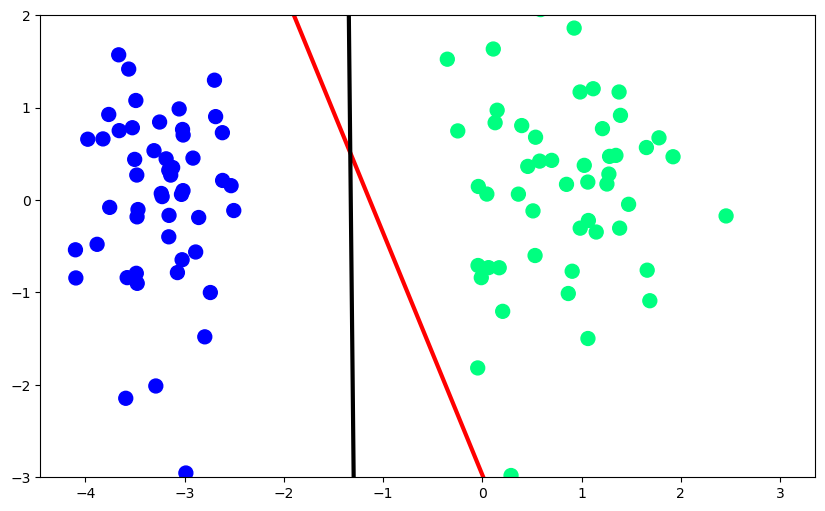

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red',linewidth=3)
plt.plot(x_input1, y_input1, color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Conclusion

The perceptron’s boundary is not symmetric and often leads to high test errors, whereas Logistic Regression (like in scikit-learn) learns a symmetric decision boundary that models the data more robustly and performs better on unseen examples.

| Property          | Perceptron                    | Logistic Regression                       |
| ----------------- | ----------------------------- | ----------------------------------------- |
| Outputs           | 0 or 1 (hard)                 | Probability between 0 and 1               |
| Loss Function     | Misclassification loss        | Log-Loss (smooth + convex)                |
| Weight Updates    | Only if misclassified (jumpy) | Always (soft, smooth)                     |
| Decision Boundary | Any separating hyperplane     | Symmetric boundary learned via likelihood |
| Generalization    | Often poor                    | Usually better                            |
